<a href="https://colab.research.google.com/github/sumasree10/OIBSIP/blob/main/Project_4_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset 1

In [ ]:
from google.colab import files
uploaded = files.upload()

import io, zipfile, pandas as pd, numpy as np, glob, os

for fn in uploaded.keys():
    path = fn
    break

if path.lower().endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[path]), 'r') as zf:
        zf.extractall('unzipped')
    csv_files = glob.glob('unzipped/**/*.csv', recursive=True) + glob.glob('unzipped/*.csv')
    if not csv_files:
        raise FileNotFoundError("No CSV found in ZIP file.")
    path = csv_files[0]

def try_read(p):
    for enc in ['utf-8','latin1','cp1252','utf-16']:
        try:
            return pd.read_csv(p, encoding=enc)
        except Exception:
            pass
    return pd.read_csv(p, engine='python')

df = try_read(path)
print('✅ Loaded:', path)
print('Shape:', df.shape)
df.head()


Saving apps.csv.zip to apps.csv.zip
✅ Loaded: unzipped/apps.csv
Shape: (9659, 14)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
pd.set_option('display.max_columns', None)
print(df.dtypes)
print(df.head(5))
print('Missing per column:')
print(df.isna().sum().sort_values(ascending=False).head(30))
df = df.drop_duplicates().reset_index(drop=True)
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()
if 'Installs' in df.columns:
    df['Installs'] = df['Installs'].str.replace(r'[+,]', '', regex=True).str.replace('Free', '0', regex=False)
    df.loc[df['Installs'].str.strip()=='' ,'Installs'] = np.nan
    df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
if 'Price' in df.columns:
    df['Price'] = df['Price'].str.replace(r'[$,]', '', regex=True)
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)
if 'Rating' in df.columns:
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
if 'Last Updated' in df.columns or 'Updated' in df.columns:
    col = 'Last Updated' if 'Last Updated' in df.columns else 'Updated'
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    except Exception:
        pass
print('After cleanup shape', df.shape)


Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART

In [ ]:
candidates = [c for c in ['target','label','Category','category','Installs','Rating','Sentiment'] if c in df.columns]
if candidates:
    target = candidates[0]
else:
    target = df.columns[-1]
y = df[target]
if pd.api.types.is_numeric_dtype(y):
    unique_count = y.nunique(dropna=True)
    if unique_count <= 20:
        task = 'classification'
    else:
        task = 'regression'
else:
    task = 'classification'
print('Detected target:', target)
print('Inferred task:', task)
print('Target value counts (top 20):')
print(y.value_counts(dropna=False).head(20))


Detected target: Category
Inferred task: classification
Target value counts (top 20):
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
Name: count, dtype: int64


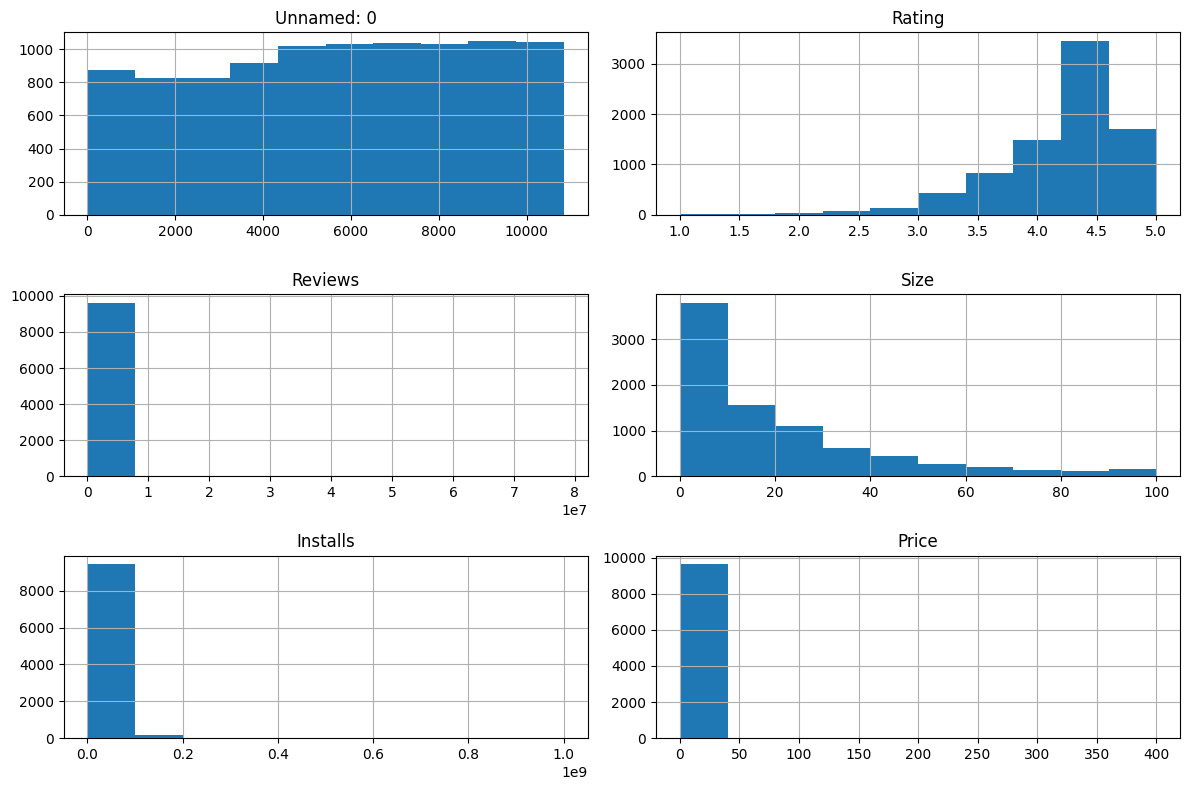

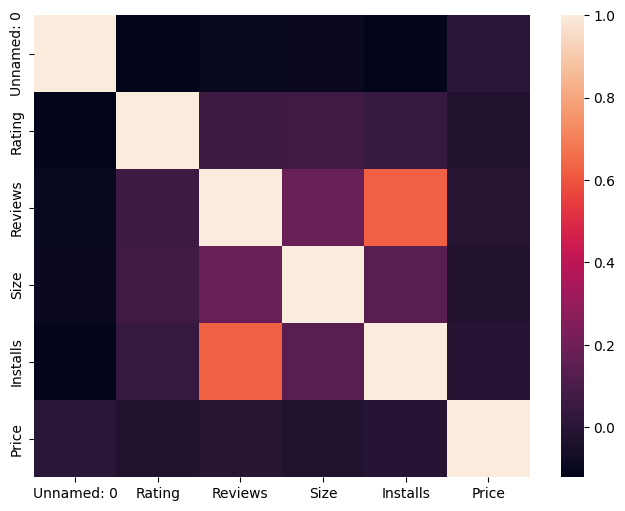

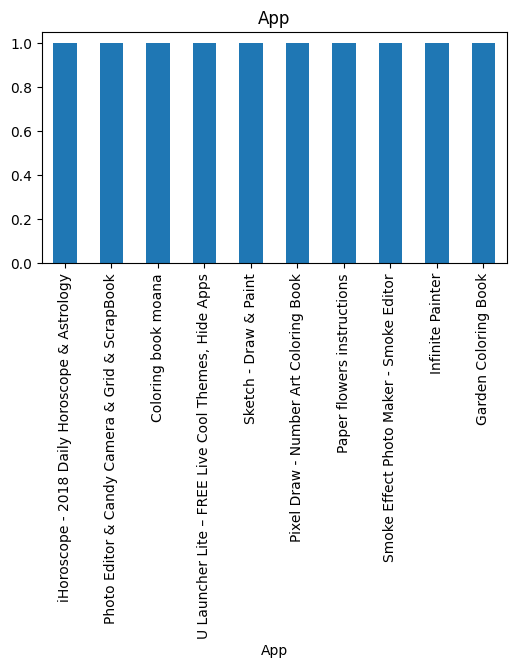

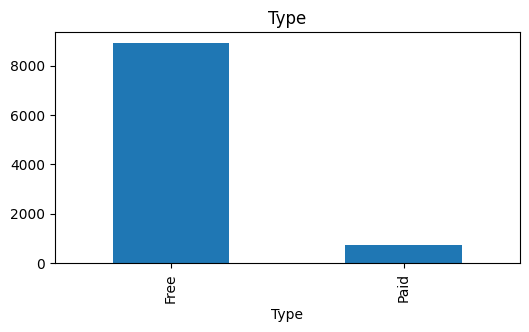

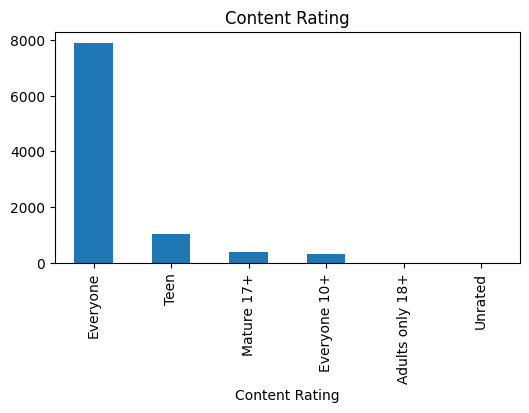

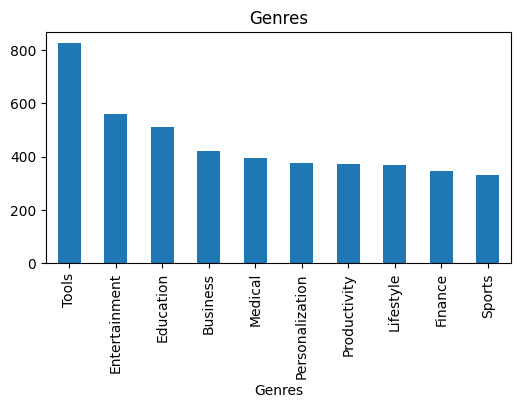

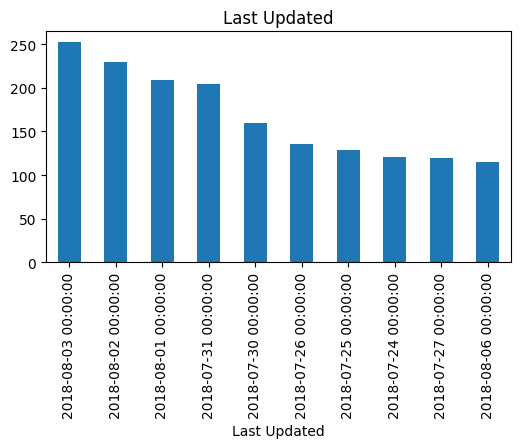

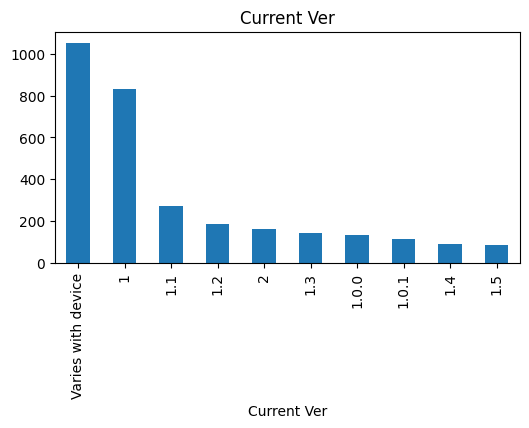

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols and c!=target]
if num_cols:
    df[num_cols].hist(figsize=(12,8))
    plt.tight_layout()
    plt.show()
if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(), annot=False)
    plt.show()
for c in cat_cols[:6]:
    plt.figure(figsize=(6,3))
    df[c].value_counts().head(10).plot(kind='bar')
    plt.title(c)
    plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
features = df.drop(columns=[target])
numeric_features = features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in features.columns if c not in numeric_features]
if 'App' in categorical_features:
    categorical_features.remove('App') if 'App' in categorical_features else None
numeric_pipeline = Pipeline([('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())])
categorical_pipeline = Pipeline([('impute', SimpleImputer(strategy='constant', fill_value='missing')), ('ohe', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([('num', numeric_pipeline, numeric_features), ('cat', categorical_pipeline, categorical_features)], remainder='drop')
X = features.copy()
y = df[target].copy()
if task == 'classification' and not pd.api.types.is_numeric_dtype(y):
    y = y.fillna('missing')
elif task == 'classification' and pd.api.types.is_numeric_dtype(y):
    if y.nunique() > 50:
        task = 'regression'
print('Final task:', task)

Final task: classification


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if task=='classification' and y.nunique()<20 else None)
if task == 'classification':
    model1 = Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=1000))])
    model2 = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))])
    for m in [model1, model2]:
        scores = cross_val_score(m, X_train, y_train, cv=5, scoring='f1_macro' if y_train.nunique()>2 else 'f1', n_jobs=-1)
        print(m.steps[-1][0], 'CV mean score', scores.mean())
    best = model2
    best.fit(X_train, y_train)
    preds = best.predict(X_test)
    print('Accuracy', accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    try:
        if y_test.nunique()==2:
            probs = best.predict_proba(X_test)[:,1]
            print('ROC AUC', roc_auc_score((y_test==y_test.unique()[1]).astype(int), probs))
    except Exception:
        pass
else:
    model1 = Pipeline([('pre', preprocessor), ('reg', LinearRegression())])
    model2 = Pipeline([('pre', preprocessor), ('reg', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))])
    model3 = Pipeline([('pre', preprocessor), ('reg', GradientBoostingRegressor(n_estimators=200, random_state=42))])
    for m in [model1, model2, model3]:
        scores = -1 * cross_val_score(m, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
        print(m.steps[-1][0], 'CV RMSE mean', scores.mean())
    best = model2
    best.fit(X_train, y_train)
    preds = best.predict(X_test)
    print('RMSE', mean_squared_error(y_test, preds, squared=False))
    print('R2', r2_score(y_test, preds))


clf CV mean score 0.9881513004247082
clf CV mean score 0.9904319677648701
Accuracy 0.9849896480331263
                     precision    recall  f1-score   support

     ART_AND_DESIGN       1.00      1.00      1.00        20
  AUTO_AND_VEHICLES       1.00      1.00      1.00        17
             BEAUTY       1.00      1.00      1.00        14
BOOKS_AND_REFERENCE       1.00      1.00      1.00        44
           BUSINESS       1.00      1.00      1.00        88
             COMICS       1.00      0.89      0.94         9
      COMMUNICATION       1.00      1.00      1.00        73
             DATING       1.00      1.00      1.00        32
          EDUCATION       1.00      0.81      0.90        27
      ENTERTAINMENT       1.00      0.89      0.94        28
             EVENTS       1.00      1.00      1.00         9
             FAMILY       0.95      0.99      0.97       378
            FINANCE       0.99      1.00      0.99        67
     FOOD_AND_DRINK       1.00      1.00   

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
if task == 'classification':
    param_dist = {'clf__n_estimators': [100,200,400], 'clf__max_depth': [None,10,20], 'clf__max_features': ['sqrt','log2',None]}
    search = RandomizedSearchCV(Pipeline([('pre', preprocessor),('clf', RandomForestClassifier(random_state=42))]), param_dist, n_iter=6, cv=3, scoring='f1_macro' if y.nunique()>2 else 'f1', n_jobs=-1, random_state=42)
else:
    param_dist = {'reg__n_estimators': [100,200,400], 'reg__max_depth': [3,10,20], 'reg__learning_rate': [0.01,0.1,0.2]}
    search = RandomizedSearchCV(Pipeline([('pre', preprocessor),('reg', GradientBoostingRegressor(random_state=42))]), param_dist, n_iter=6, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42)
search.fit(X_train, y_train)
print('Best params', search.best_params_)
final_model = search.best_estimator_
final_model.fit(X_train, y_train)
if task=='classification':
    final_preds = final_model.predict(X_test)
    print('Final Accuracy', accuracy_score(y_test, final_preds))
    print(classification_report(y_test, final_preds))
else:
    final_preds = final_model.predict(X_test)
    print('Final RMSE', mean_squared_error(y_test, final_preds, squared=False))
    print('Final R2', r2_score(y_test, final_preds))


Best params {'clf__n_estimators': 400, 'clf__max_features': None, 'clf__max_depth': None}
Final Accuracy 0.9984472049689441
                     precision    recall  f1-score   support

     ART_AND_DESIGN       1.00      1.00      1.00        20
  AUTO_AND_VEHICLES       1.00      1.00      1.00        17
             BEAUTY       1.00      1.00      1.00        14
BOOKS_AND_REFERENCE       1.00      1.00      1.00        44
           BUSINESS       1.00      1.00      1.00        88
             COMICS       1.00      0.89      0.94         9
      COMMUNICATION       1.00      1.00      1.00        73
             DATING       1.00      1.00      1.00        32
          EDUCATION       0.96      1.00      0.98        27
      ENTERTAINMENT       1.00      1.00      1.00        28
             EVENTS       1.00      1.00      1.00         9
             FAMILY       1.00      1.00      1.00       378
            FINANCE       1.00      1.00      1.00        67
     FOOD_AND_DRINK  

In [ ]:
import joblib
os.makedirs('/mnt/data/output', exist_ok=True)
joblib.dump(final_model, '/mnt/data/output/final_model.joblib')
results = pd.DataFrame({'y_true': y_test.reset_index(drop=True), 'y_pred': pd.Series(final_preds).reset_index(drop=True)})
results.to_csv('/mnt/data/output/eval_results.csv', index=False)
print('Saved model to /mnt/data/output/final_model.joblib')
print('Saved predictions to /mnt/data/output/eval_results.csv')


Saved model to /mnt/data/output/final_model.joblib
Saved predictions to /mnt/data/output/eval_results.csv


Dataset 2

In [ ]:
from google.colab import files
import io, zipfile, pandas as pd, glob, os
uploaded = files.upload()
path = list(uploaded.keys())[0]
if path.lower().endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[path]), 'r') as zf:
        zf.extractall('unzipped')
    csv_files = glob.glob('unzipped/**/*.csv', recursive=True) + glob.glob('unzipped/*.csv')
    if not csv_files:
        raise FileNotFoundError('No CSV found in uploaded ZIP.')
    path = csv_files[0]
def try_read(p):
    for enc in ['utf-8','latin1','cp1252','utf-16']:
        try:
            return pd.read_csv(p, encoding=enc)
        except Exception:
            pass
    return pd.read_csv(p, engine='python')
df = try_read(path)
print('Loaded', path)
print('Shape', df.shape)
df.head()


Saving user_reviews.csv.zip to user_reviews.csv.zip
Loaded unzipped/apps.csv
Shape (9659, 14)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
import numpy as np
pd.set_option('display.max_columns', None)
print(df.dtypes)
print(df.shape)
print(df.isna().sum().sort_values(ascending=False).head(30))
df = df.drop_duplicates().reset_index(drop=True)
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()
if 'Installs' in df.columns:
    df['Installs'] = df['Installs'].str.replace(r'[+,]', '', regex=True).str.replace('Free', '0', regex=False)
    df.loc[df['Installs'].str.strip()=='' ,'Installs'] = np.nan
    df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
if 'Price' in df.columns:
    df['Price'] = df['Price'].str.replace(r'[$,]', '', regex=True)
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)
if 'Rating' in df.columns:
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
date_col = None
for candidate in ['Last Updated','Updated','Last_Updated','last_updated','date','Date']:
    if candidate in df.columns:
        date_col = candidate
        break
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
print('After cleanup shape', df.shape)
df.head()


Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
(9659, 14)
Rating            1463
Size              1227
Current Ver          8
Android Ver          2
App                  0
Unnamed: 0           0
Reviews              0
Category             0
Installs             0
Type                 0
Content Rating       0
Price                0
Last Updated         0
Genres               0
dtype: int64
After cleanup shape (9659, 14)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
candidates = [c for c in ['target','label','Category','category','Installs','Rating','Sentiment'] if c in df.columns]
target = candidates[0] if candidates else df.columns[-1]
y = df[target]
if pd.api.types.is_numeric_dtype(y):
    unique_count = int(y.nunique(dropna=True))
    task = 'classification' if unique_count <= 20 else 'regression'
else:
    task = 'classification'
print('Detected target:', target)
print('Inferred task:', task)
print(y.value_counts(dropna=False).head(20))


Detected target: Category
Inferred task: classification
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
Name: count, dtype: int64


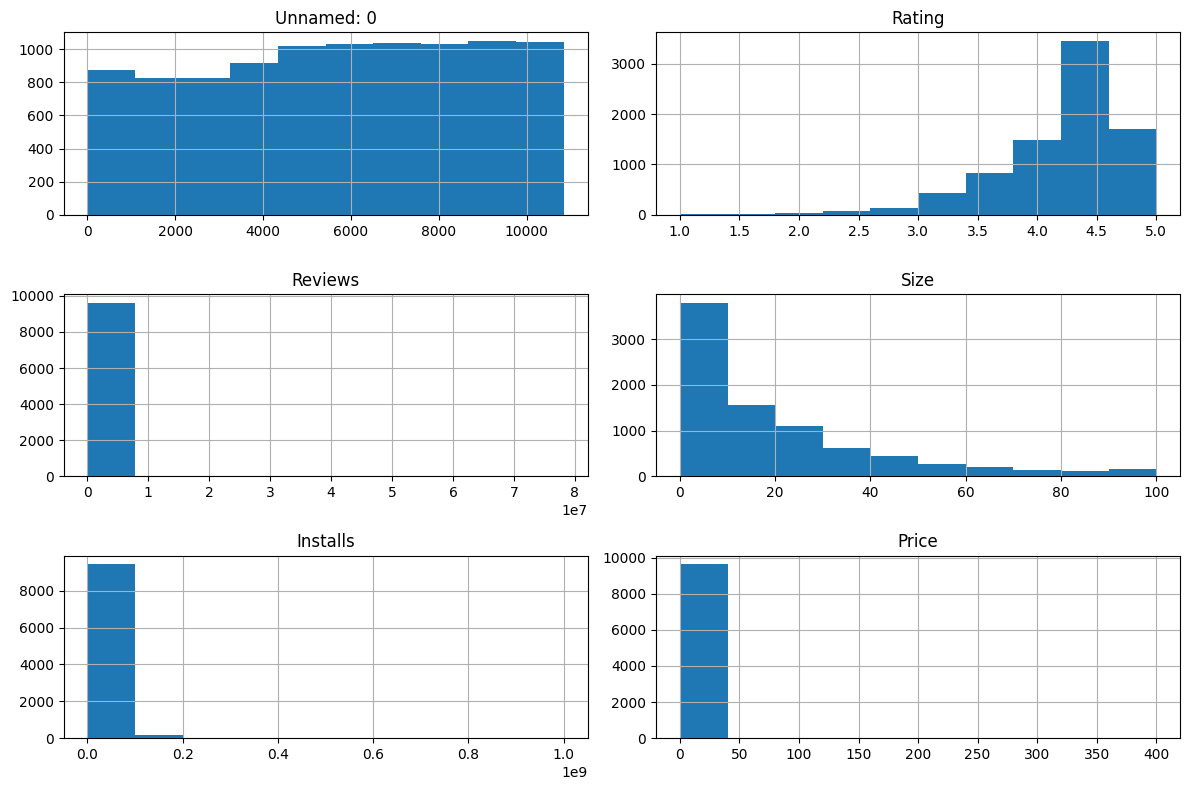

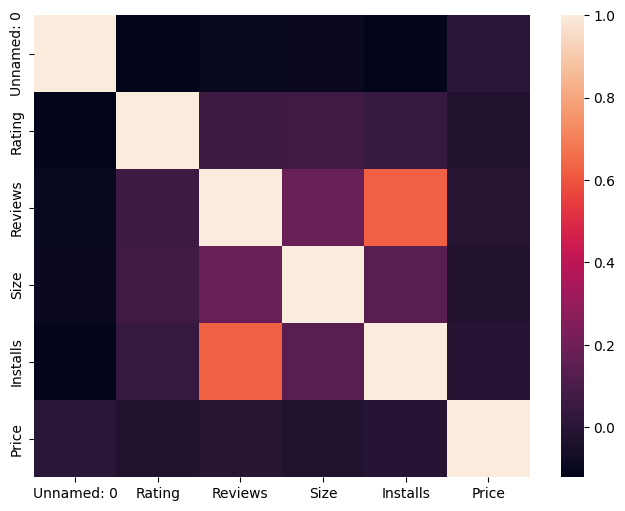

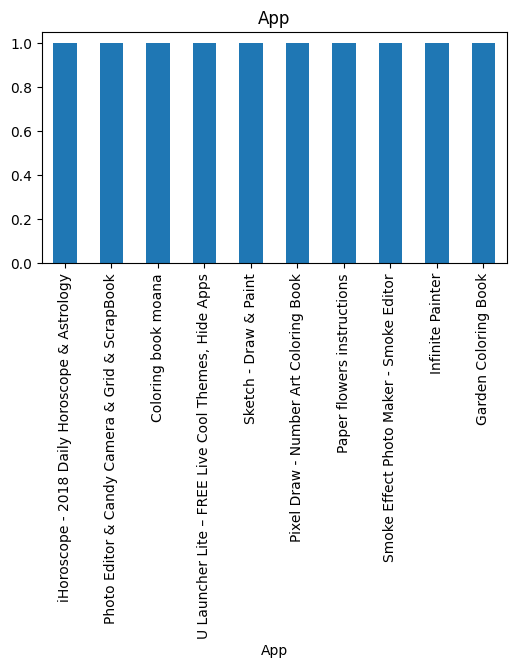

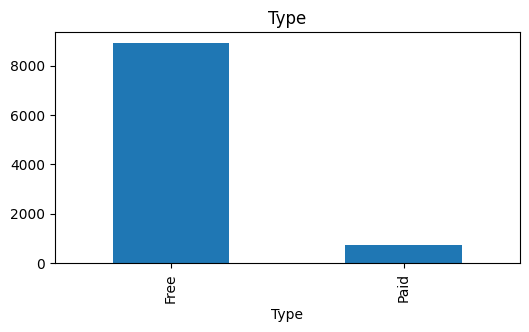

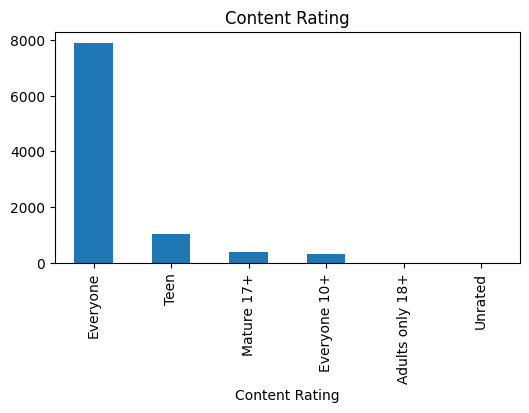

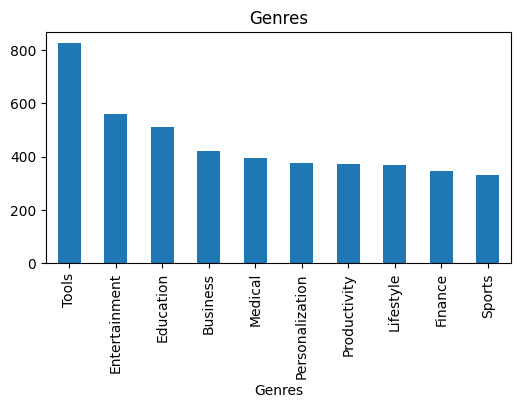

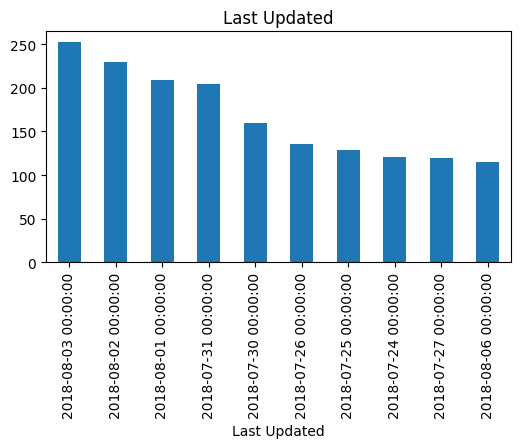

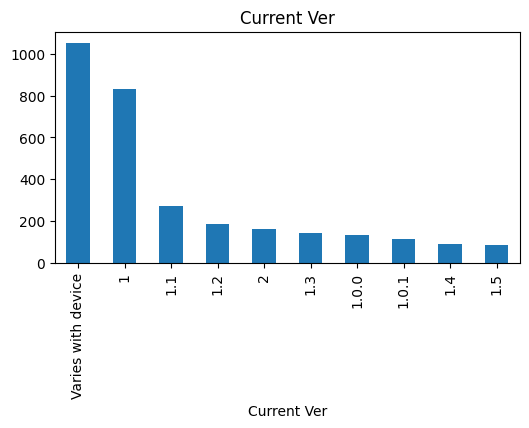

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols and c!=target]
if num_cols:
    df[num_cols].hist(figsize=(12,8))
    plt.tight_layout()
    plt.show()
if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(), annot=False)
    plt.show()
for c in cat_cols[:6]:
    plt.figure(figsize=(6,3))
    df[c].value_counts().head(10).plot(kind='bar')
    plt.title(c)
    plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
features = df.drop(columns=[target])
numeric_features = features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in features.columns if c not in numeric_features]
if 'App' in categorical_features:
    categorical_features = [c for c in categorical_features if c!='App']
numeric_pipeline = Pipeline([('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())])
categorical_pipeline = Pipeline([('impute', SimpleImputer(strategy='constant', fill_value='missing')), ('ohe', OneHotEncoder(handle_unknown='ignore'))])
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([('num', numeric_pipeline, numeric_features), ('cat', categorical_pipeline, categorical_features)], remainder='drop')
X = features.copy()
y = df[target].copy()
if task == 'classification' and not pd.api.types.is_numeric_dtype(y):
    y = y.fillna('missing')
elif task == 'classification' and pd.api.types.is_numeric_dtype(y):
    if y.nunique() > 50:
        task = 'regression'
print('Final task:', task)
print('Numeric features', numeric_features)
print('Categorical features', categorical_features[:10])

Final task: classification
Numeric features ['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price']
Categorical features ['Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
stratify_y = y if task=='classification' and y.nunique() < 20 else None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=stratify_y)
if task == 'classification':
    model1 = Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=1000))])
    model2 = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))])
    for m in [model1, model2]:
        score = cross_val_score(m, X_train, y_train, cv=5, scoring='f1_macro' if y_train.nunique()>2 else 'f1', n_jobs=-1)
        print(m.steps[-1][0], 'CV mean', score.mean())
    best = model2
    best.fit(X_train, y_train)
    preds = best.predict(X_test)
    print('Accuracy', accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
else:
    model1 = Pipeline([('pre', preprocessor), ('reg', LinearRegression())])
    model2 = Pipeline([('pre', preprocessor), ('reg', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))])
    model3 = Pipeline([('pre', preprocessor), ('reg', GradientBoostingRegressor(n_estimators=200, random_state=42))])
    for m in [model1, model2, model3]:
        score = -1 * cross_val_score(m, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
        print(m.steps[-1][0], 'CV RMSE mean', score.mean())
    best = model2
    best.fit(X_train, y_train)
    preds = best.predict(X_test)
    print('RMSE', mean_squared_error(y_test, preds, squared=False))
    print('R2', r2_score(y_test, preds))


clf CV mean 0.9881513004247082


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


clf CV mean 0.9904319677648701
Accuracy 0.9849896480331263
                     precision    recall  f1-score   support

     ART_AND_DESIGN       1.00      1.00      1.00        20
  AUTO_AND_VEHICLES       1.00      1.00      1.00        17
             BEAUTY       1.00      1.00      1.00        14
BOOKS_AND_REFERENCE       1.00      1.00      1.00        44
           BUSINESS       1.00      1.00      1.00        88
             COMICS       1.00      0.89      0.94         9
      COMMUNICATION       1.00      1.00      1.00        73
             DATING       1.00      1.00      1.00        32
          EDUCATION       1.00      0.81      0.90        27
      ENTERTAINMENT       1.00      0.89      0.94        28
             EVENTS       1.00      1.00      1.00         9
             FAMILY       0.95      0.99      0.97       378
            FINANCE       0.99      1.00      0.99        67
     FOOD_AND_DRINK       1.00      1.00      1.00        27
               GAME      

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
if task == 'classification':
    param_dist = {'clf__n_estimators': [100,200,400], 'clf__max_depth': [None,10,20], 'clf__max_features': ['sqrt','log2',None]}
    search = RandomizedSearchCV(Pipeline([('pre', preprocessor),('clf', RandomForestClassifier(random_state=42))]), param_dist, n_iter=6, cv=3, scoring='f1_macro' if y.nunique()>2 else 'f1', n_jobs=-1, random_state=42)
else:
    param_dist = {'reg__n_estimators': [100,200,400], 'reg__max_depth': [3,10,20], 'reg__learning_rate': [0.01,0.1,0.2]}
    from sklearn.ensemble import GradientBoostingRegressor
    search = RandomizedSearchCV(Pipeline([('pre', preprocessor),('reg', GradientBoostingRegressor(random_state=42))]), param_dist, n_iter=6, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42)
search.fit(X_train, y_train)
print('Best params', search.best_params_)
final_model = search.best_estimator_
final_model.fit(X_train, y_train)
if task=='classification':
    final_preds = final_model.predict(X_test)
    from sklearn.metrics import accuracy_score, classification_report
    print('Final Accuracy', accuracy_score(y_test, final_preds))
    print(classification_report(y_test, final_preds))
else:
    final_preds = final_model.predict(X_test)
    from sklearn.metrics import mean_squared_error, r2_score
    print('Final RMSE', mean_squared_error(y_test, final_preds, squared=False))
    print('Final R2', r2_score(y_test, final_preds))


Best params {'clf__n_estimators': 400, 'clf__max_features': None, 'clf__max_depth': None}
Final Accuracy 0.9984472049689441
                     precision    recall  f1-score   support

     ART_AND_DESIGN       1.00      1.00      1.00        20
  AUTO_AND_VEHICLES       1.00      1.00      1.00        17
             BEAUTY       1.00      1.00      1.00        14
BOOKS_AND_REFERENCE       1.00      1.00      1.00        44
           BUSINESS       1.00      1.00      1.00        88
             COMICS       1.00      0.89      0.94         9
      COMMUNICATION       1.00      1.00      1.00        73
             DATING       1.00      1.00      1.00        32
          EDUCATION       0.96      1.00      0.98        27
      ENTERTAINMENT       1.00      1.00      1.00        28
             EVENTS       1.00      1.00      1.00         9
             FAMILY       1.00      1.00      1.00       378
            FINANCE       1.00      1.00      1.00        67
     FOOD_AND_DRINK  

In [ ]:
import joblib, os
os.makedirs('output', exist_ok=True)
joblib.dump(final_model, 'output/final_model.joblib')
import pandas as pd
results = pd.DataFrame({'y_true': y_test.reset_index(drop=True), 'y_pred': pd.Series(final_preds).reset_index(drop=True)})
results.to_csv('output/eval_results.csv', index=False)
print('Saved model to output/final_model.joblib')
print('Saved predictions to output/eval_results.csv')


Saved model to output/final_model.joblib
Saved predictions to output/eval_results.csv
